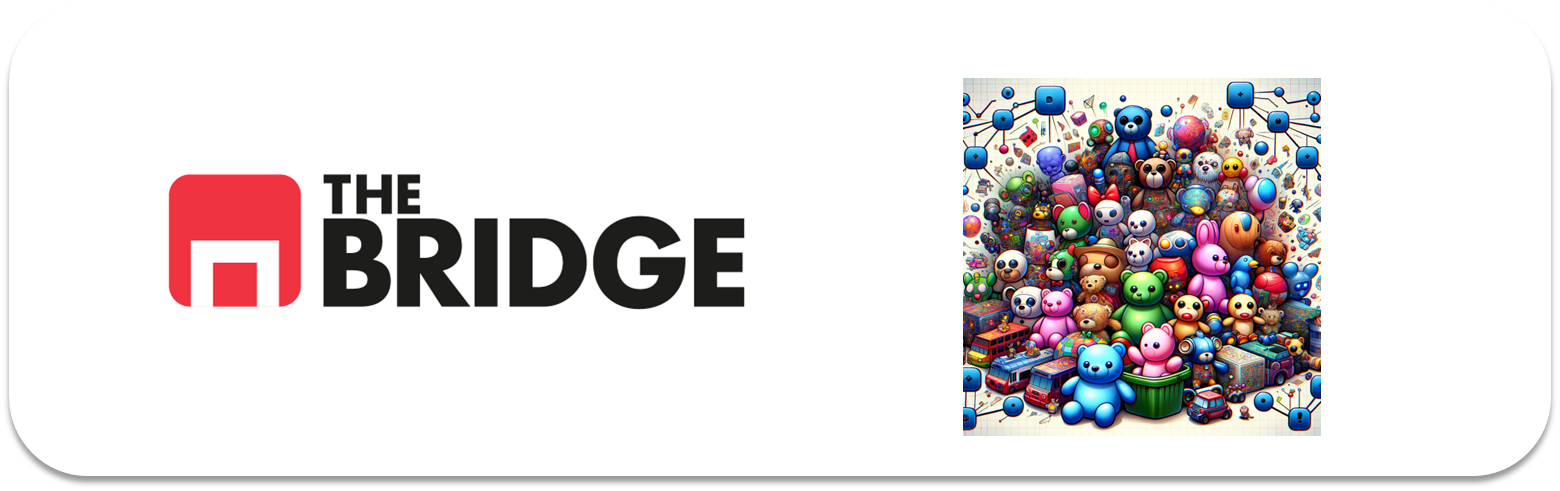

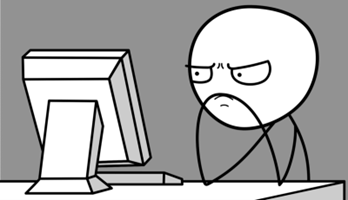

Para ejercitarte y afianzar lo aprendido sobre **DBSCAN**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Problema y "justificación": DBSCAN

Como sabemos, existen diversas técnicas de clusterización comprendidas por algoritmos de machine learning no supervisados, cuya finalidad es agrupar distintos elementos de una data sin la necesidad de estar previamente etiquetados. 

Anteriormente utilizamos el algoritmo de KMeans, sin embargo, dicho algoritmo tiene algunas limitaciones, como el hecho de que no siempre es sencillo obtener un número de K clusters óptimo o que algunas distribuciones de datos no se ajustan a la agrupación por clusters debido a la naturaleza del algoritmo. Para estos casos existen diversos algoritmos de clusterización. 

A continuación, vamos a utilizar el algoritmo DBSCAN (Density-Based Spatial Clustering of Applications with Noise) para capturar grupos en data con patrones relativamente complejos.

Utilizaremos data de clientes de un distribuidor al por mayor, en el que se recogen por línea ventas a diferentes establecimientos y empresas de sus productos (aunque no se incluye el identificador de establecimiento) y cuyo objetivo es obtener agrupacioines interesantes (agrupaciones no predefinidas de productos que se suelen comprar juntos):

Features:

    1) FRESH: Gastos en productos frescos;
    2) MILK: Gastos en productos lacteos;
    3) GROCERY: Gastos en comestibles;
    4) FROZEN: Gastos en congelados;
    5) DETERGENTS_PAPER: Gastos en detergentes y derivados del papel;
    6) DELICATESSEN: Gatos en comestibles finos;
    7) CHANNEL: Canal que utilizan los clientes para vender - Horeca (Hotel/Restaurant/Cafeterías) o Retail channel (Al por menor);
    8) REGION: Región del cliente;

Fuente: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import bootcampviztools as bt
from sklearn.cluster import DBSCAN

### Ejercicio 1

Carga los datos y haz una primera exploración, incluyendo una descripción de las variables numéricas.

In [2]:
df = pd.read_csv('data/wholesale-customers-data.csv')
df.rename(columns={'Delicassen':'Delicatessen'}, inplace=True)
df.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


$$***$$

Es hora de hacer un miniEda (cuyo objetivo en el caso de clusterizacion no es obtener features para predicción de un target que no tenemos), cuyo objetivo es poder intuir posibles agrupaciones y su número, detectar si hay que hacer transformaciones y escalado en las variables y cuál

### Ejercicio 2



Pinta el histograma de las variables y determina cuáles podríamos considerar numéricas continuas y cuáles numéricas discretas (o categóricas)

<Figure size 800x800 with 0 Axes>

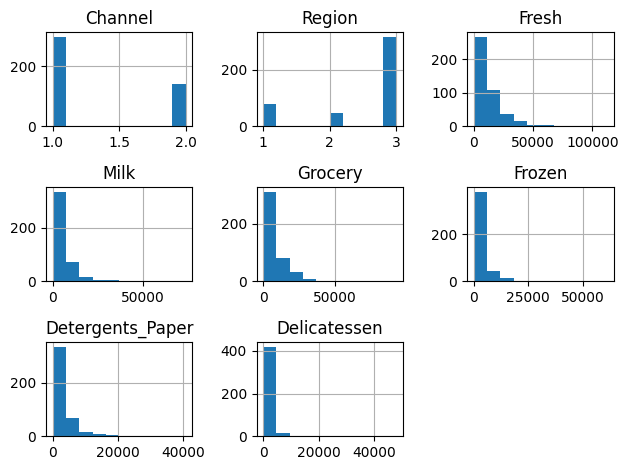

In [4]:
num_columns = []

for col in df.columns:
    num_columns.append(col)

plt.figure(figsize=(8,8))
df[ num_columns].hist()
plt.tight_layout()
plt.show()

Podemos considerar como numéricas discretas las variables `Channel` y `Region`. Podemos considerar variables numéricas continuas `Fresh`,`Milk`,`Grocery`,`Frozen`,`Detergents_Paper`,`Delicatessen`

In [5]:
num_columns.remove('Channel')
num_columns.remove('Region')
cat_columns = ['Channel','Region']

### Ejercicio 3

Antes de decidir sobre las agrupaciones, vamos pintar los histrogramas pero separando por canal (ya que es un elemento muy diferenciador del tipo de venta que se realiza a mayorista). Muestra graficamente para cada variable numérica su histograma para cada canal (Horeca y Retail). 

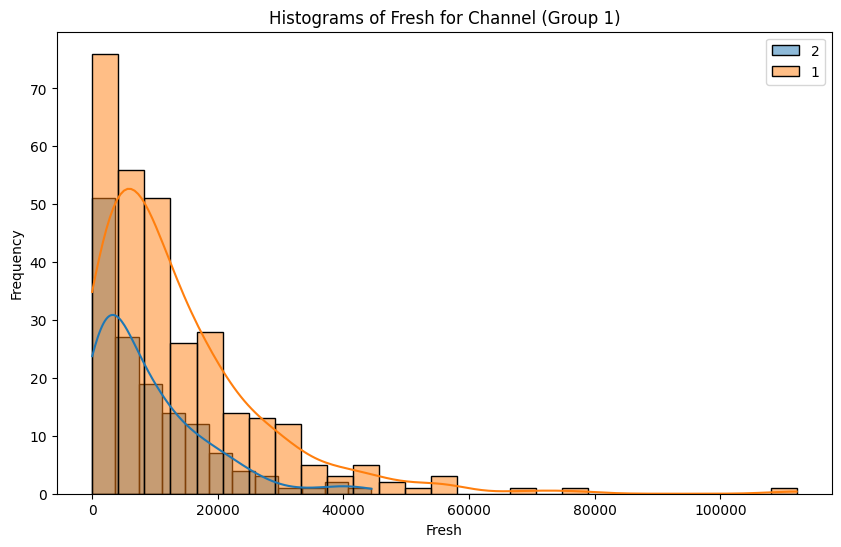

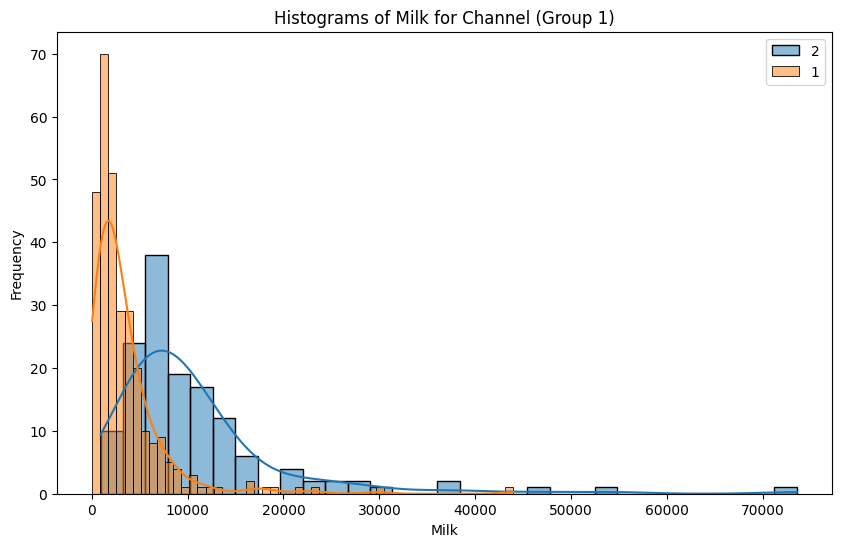

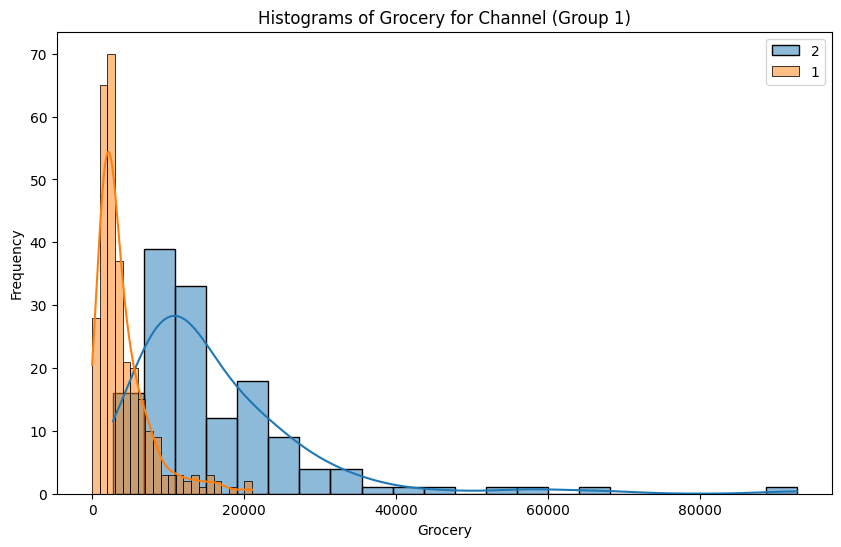

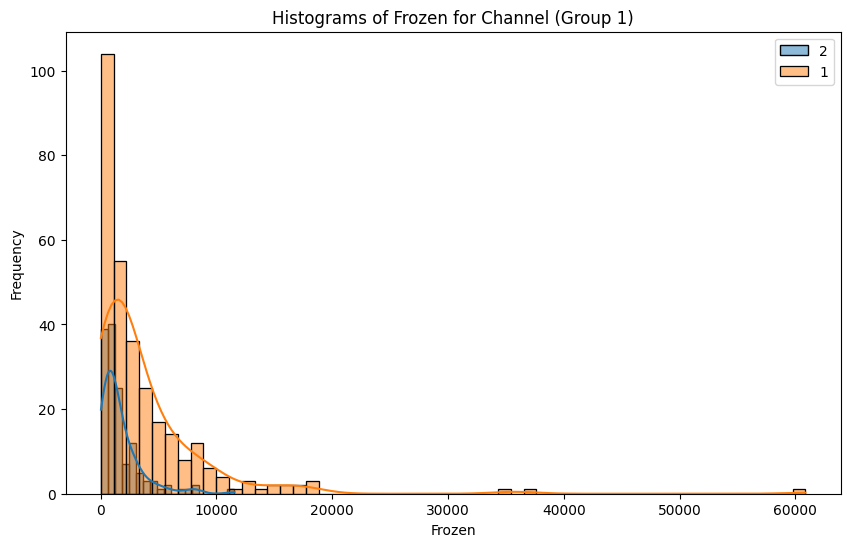

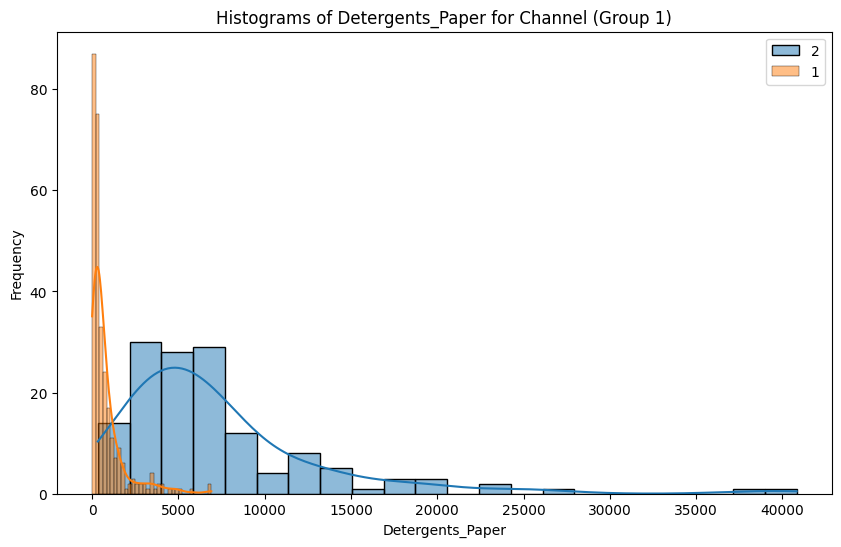

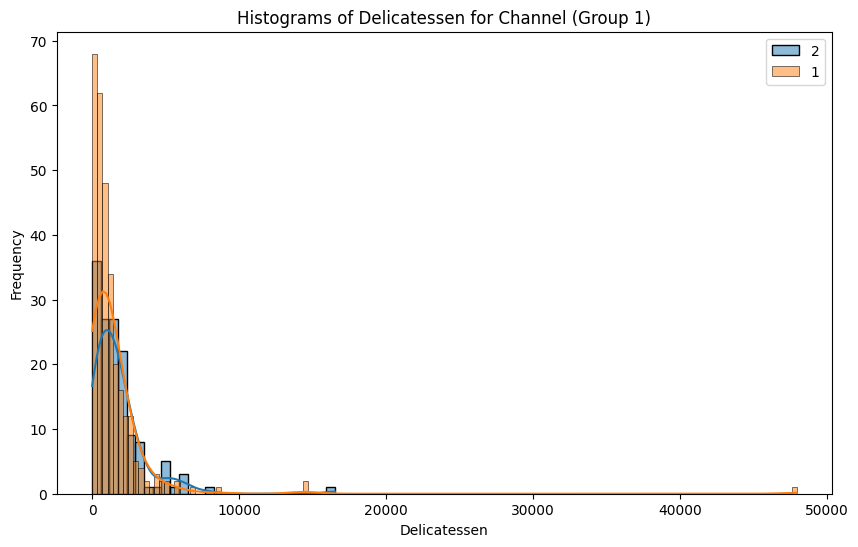

In [6]:
for col in num_columns:
    bt.plot_grouped_histograms(df, cat_col = 'Channel', num_col=col, group_size=2)

### Ejercicio 4

Analicemos los outliers. Obten los outliers a partir de los diagramas de boxplot para todos los datos y luego separados por canal.

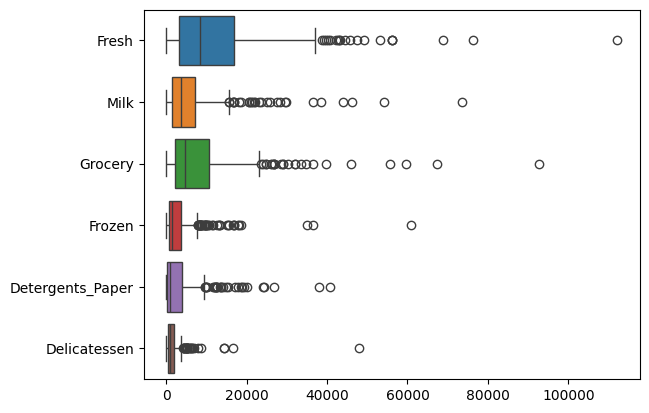

In [7]:
sns.boxplot(df[num_columns], orient='h');

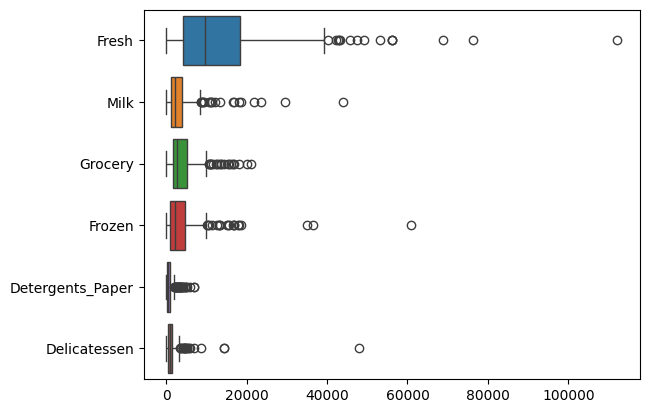

In [8]:
# Horeca = 1
sns.boxplot(df[df['Channel'] == 1][num_columns], orient = 'h');

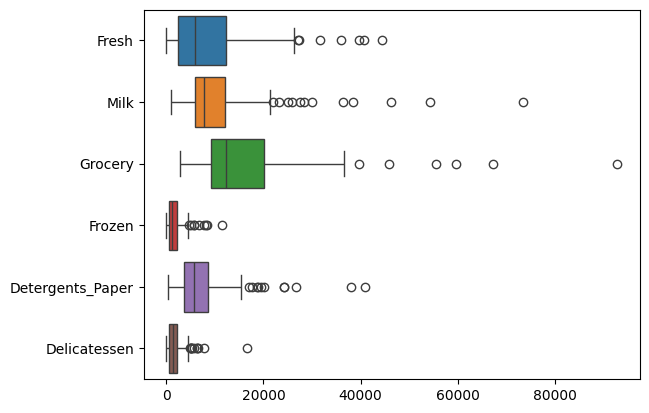

In [9]:
# Retail = 2
sns.boxplot(df[df['Channel'] == 2][num_columns], orient = 'h');

Hay outliers en todas las features tanto para un canal como para el otro. Tendremos que escalar las variables.

### Ejercicio 5

Vamos a intentar detectar posibles agrupaciones en los datos con variables dos a dos. Utiliza un pairplot de sns para mostrar los scatter plots de las variables numéricas dos a dos e intentar visualizar algún clustering e incluso justificar usar kMeans o DBSCAN. En este ejercicio hazlo para todo el dataset.

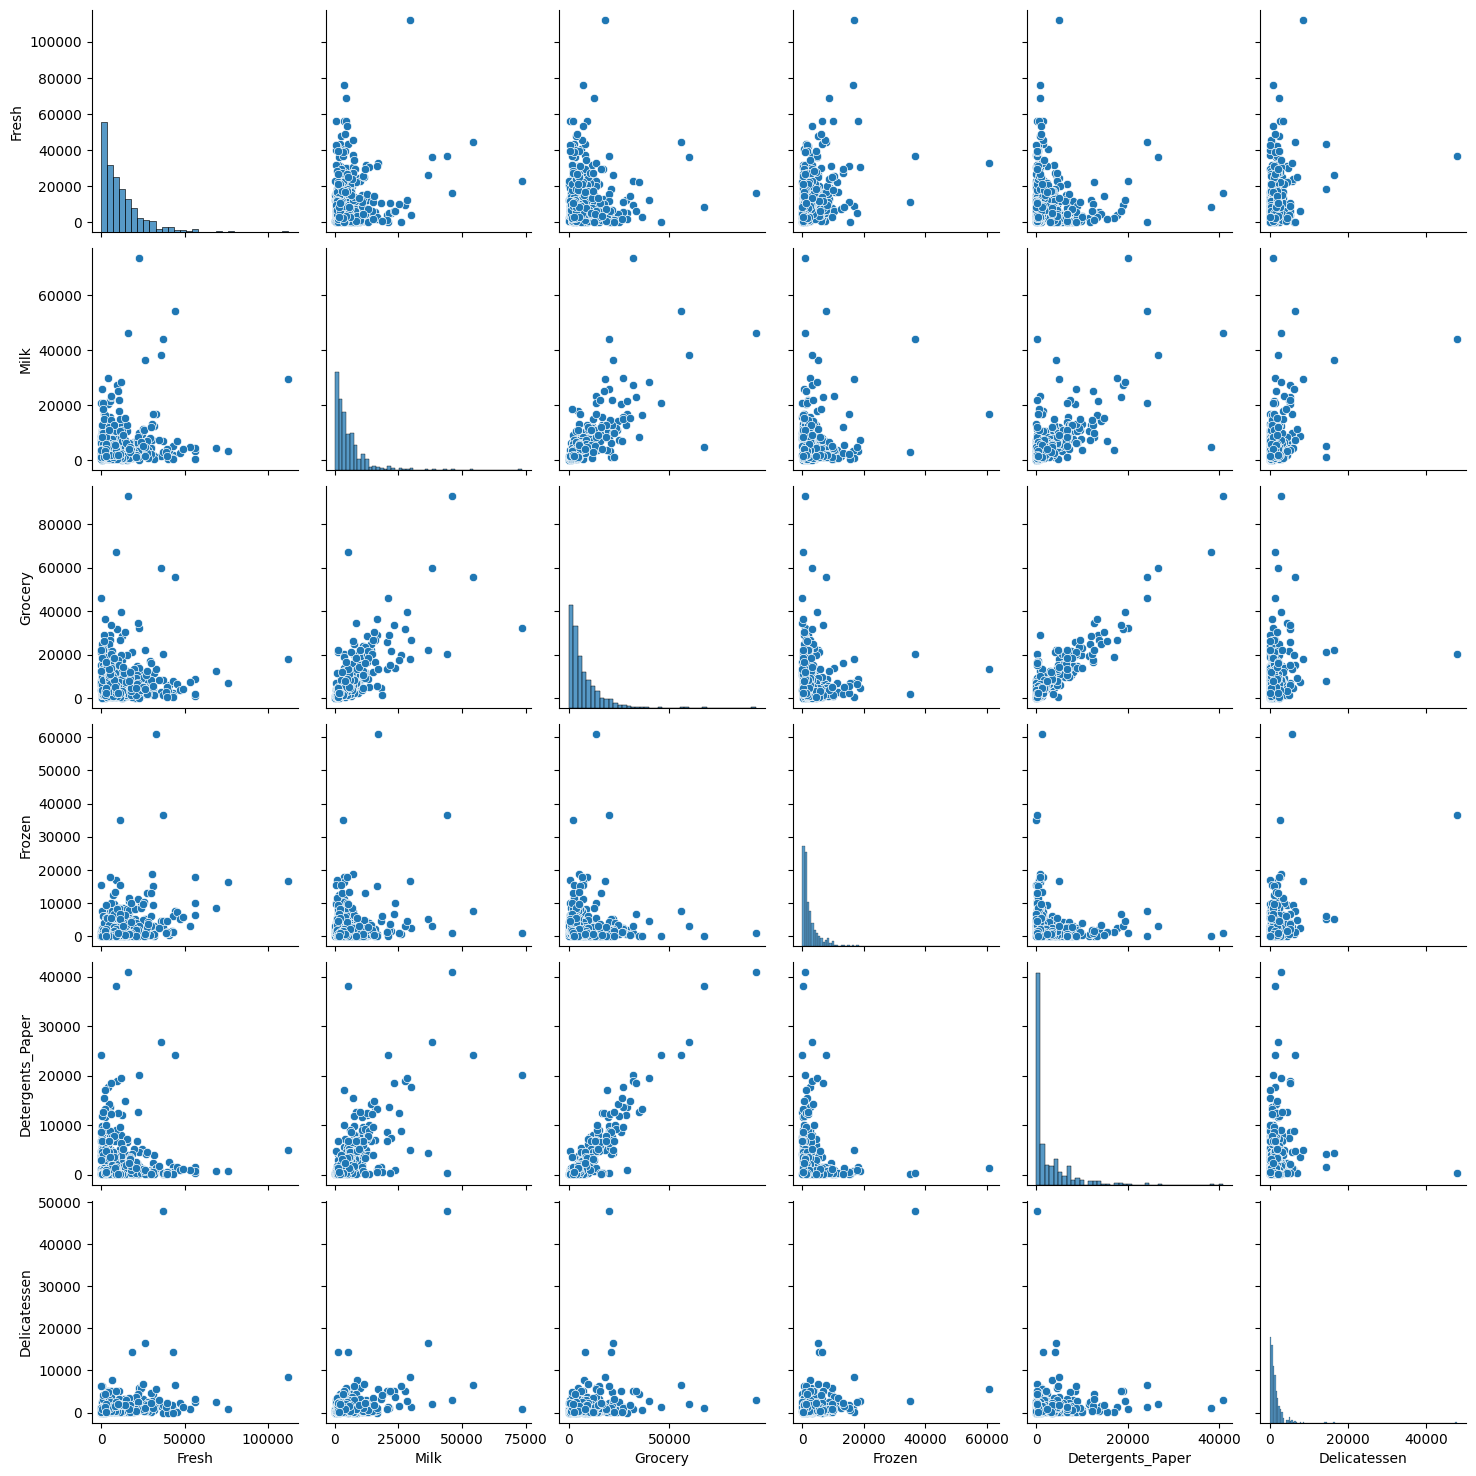

In [10]:
sns.pairplot(data = df[num_columns]);

No se pueden observar manchas o pequeños clusters en el pairplot anterior.

### Ejercicio 6

Repite el ejercicio 5 pero separando por canal. Emplea el argumento hue del pairplot para no tener que hacer dos pairplots diferentes. 

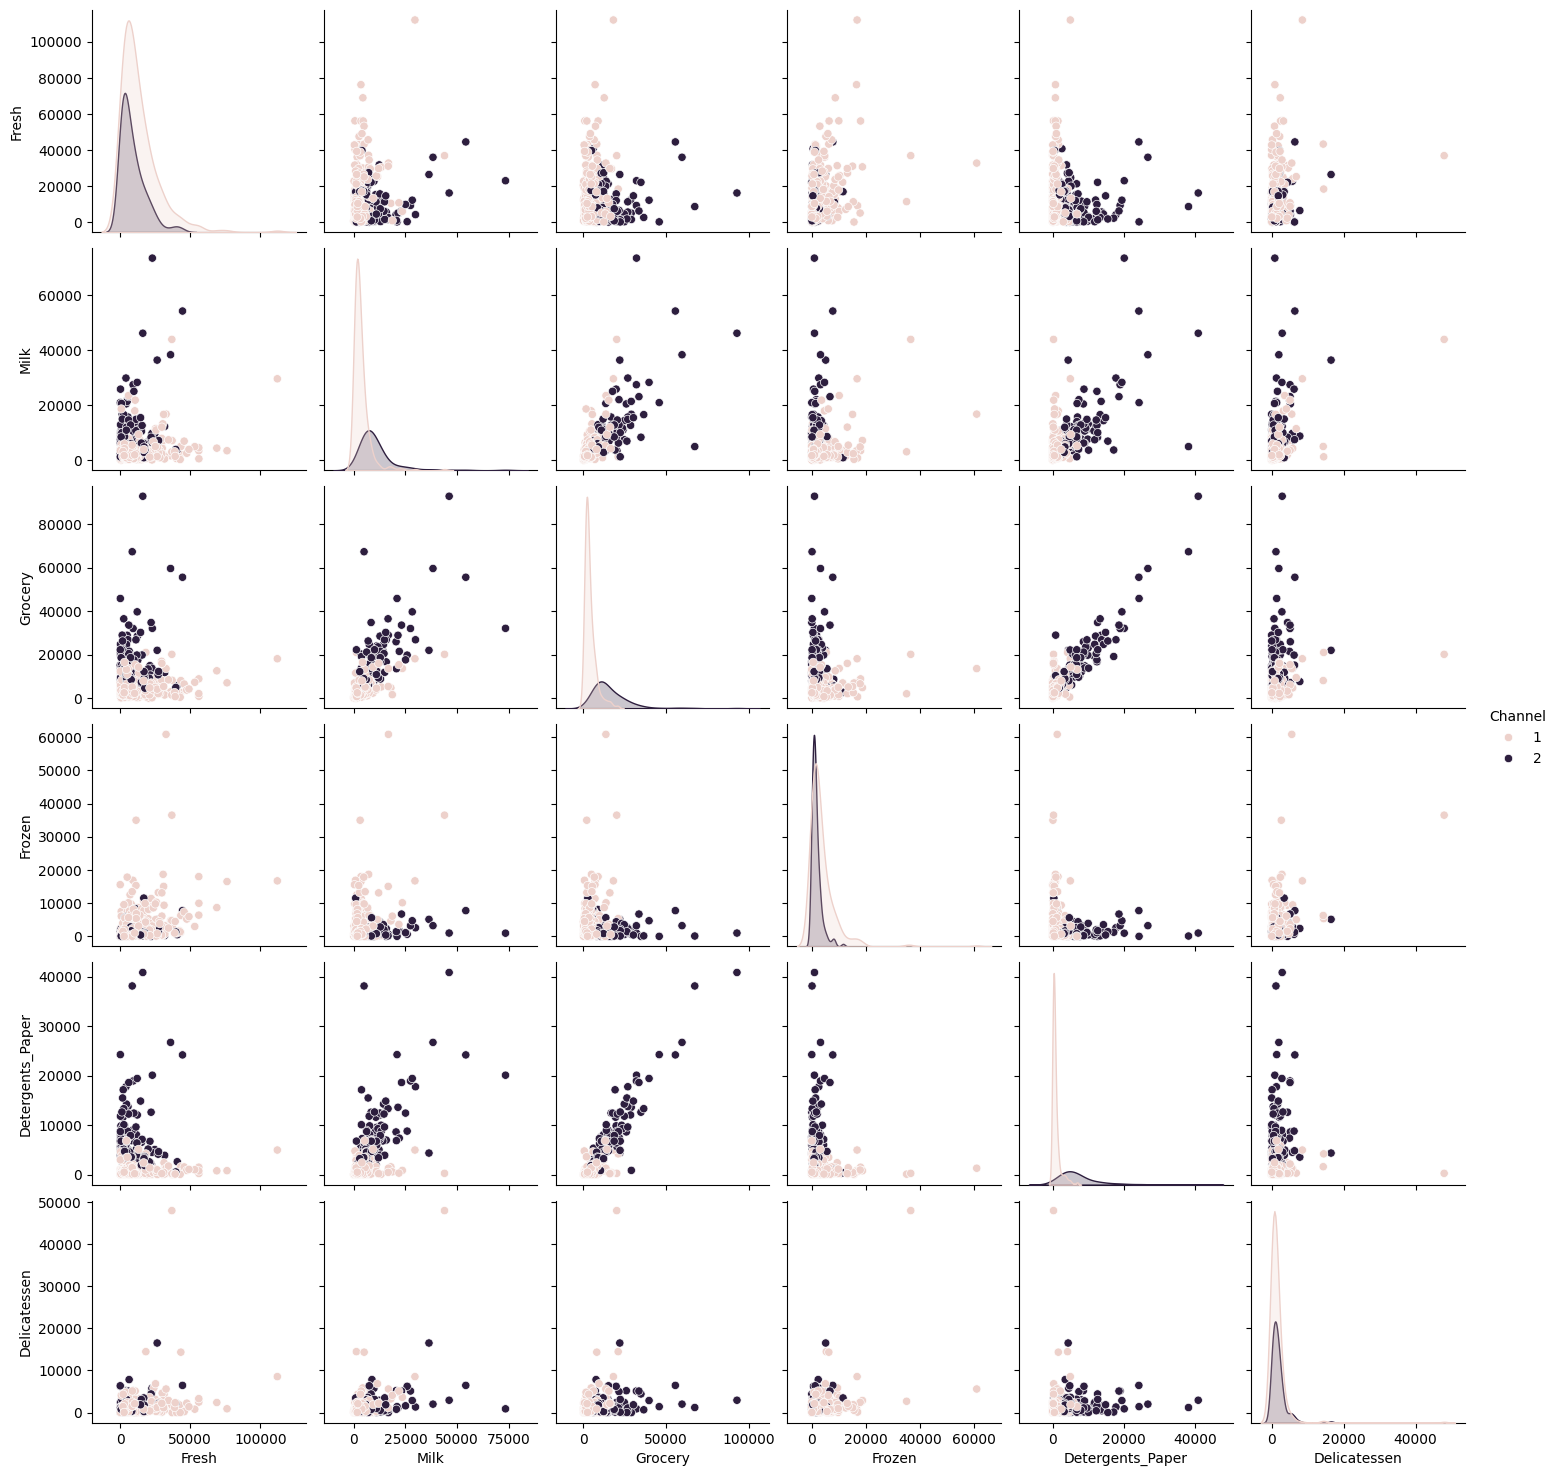

In [11]:
sns.pairplot(data = df[num_columns + ['Channel']], hue = 'Channel');

Como se podía intuir, pero sólo eso, sí que parece haber dos regiones de puntos según el canal (fijate en por ejemplo en Fresh y Grocery (columna 1, fila 3 empezando por arriba); hay dos regiones una inferior para canal 1 (HORECA) y otra superior para canal 2 (Retail). Pero también puedes ver que están demasiado juntas como para que un kmeans las consiga separar tal cual. En estos casos, tiene mejor pinta usar un DBSCAN

En otras palabras, al contrastar los scatter plots podemos empezar a intuir que un clustering con KMeans podría no ser lo más conveniente por la distribucion de los datos, no se observan los típicos focos de agrupación y patrones (circulos o "blobs") que solemos buscar agrupar con KMeans, siendo un patrón mas irregular. Otro factor a considerar es la presencia de multiples outliers, el DBSCAN suele ser robusto ante outliers y ruido ya que no obliga a los mismos a ser parte de un cluster.

### Ejercicio 7

Si has logrado hacer los dos ejercicios anteriores (y si no consulta su solución) tendrás una idea un poco más clara de por qué es interesante la clusterización con DBSCAN mejor que con KMeans. Así que vamos a utilizarlo, pero antes escalemos los datos, transformándolos primero (de primeras no vamos a distinguir entre canales, hazlo con todo el dataseet). Es decir aplica la tranformación que creas necesaria en las columnas numéricas que creas conveniente. Hazlo en un dataframe copiado del original para poder interpretar los valores correctamente al final.

In [12]:
df_scal = df.copy()

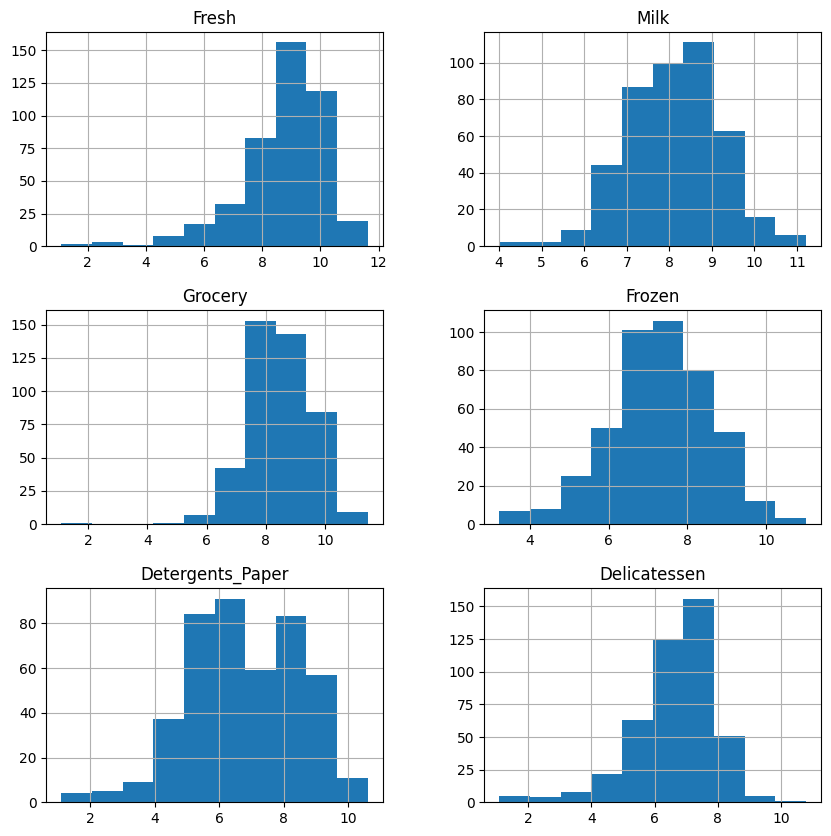

In [13]:
df_scal[num_columns] = df_scal[num_columns].apply(np.log)
df_scal[num_columns].hist(figsize=(10,10));

### Ejercicio 8

Escala las columnas que creas necesario. Si no lo tienes claro, escala todas.

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scal = scaler.fit_transform(df_scal)

### Ejercicio 9

En el caso de los modelos no supervisados, una vez hemos tratado las features hay que escoger los hiperparámetros. En el caso de dBSCAN no es el número de clústeres, sino la distancia `eps` que determina el vecindario de un punto y el número de vecinos a partir del cual se decide si una instancia es core o no (`min_samples`). 

Una forma de hacerlo es iterar sobre rangos de estos dos hiperparámetros midiendo el porentaje de "anomalías" que detecta y considerando como punto de parada un valor por debajo del 10%.

NOTA: Usa el doble de cantidad de tus features para el mínimo de elementos y un rango para el epsilon de 0.001 a 3. Para min_samples vamos a usar un valor "estimado" que corresponde a 2 veces el número de features empleadas.

In [15]:
outlier_percent = []

for eps in np.linspace(0.001,3,50): # Genera 50 valores equidistantes entre 0.001 y 3
    
    dbscan = DBSCAN(eps = eps, min_samples = 2*df_scal.shape[1])
    dbscan.fit(df_scal)

    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

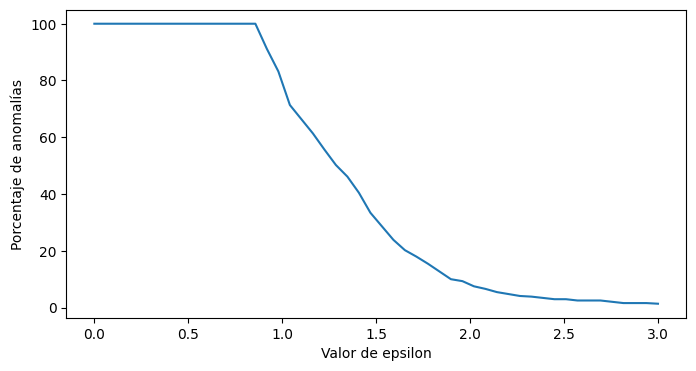

In [16]:
plt.figure(figsize=(8,4))
sns.lineplot(x = np.linspace(0.001,3,50), y = outlier_percent)
plt.ylabel('Porcentaje de anomalías')
plt.xlabel('Valor de epsilon')

plt.show()

In [17]:
for indice,eps in [(indice,val) for indice,val in enumerate(np.linspace(0.001,3,50)) if 1.5 <= val <= 2.2]:
    print(f"Para {eps}: {outlier_percent[indice]}% de anomalías")

Para 1.5311020408163265: 28.636363636363637% de anomalías
Para 1.5923061224489796: 23.863636363636363% de anomalías
Para 1.6535102040816325: 20.227272727272727% de anomalías
Para 1.7147142857142856: 17.954545454545453% de anomalías
Para 1.7759183673469388: 15.454545454545455% de anomalías
Para 1.8371224489795916: 12.727272727272727% de anomalías
Para 1.8983265306122448: 10.0% de anomalías
Para 1.9595306122448979: 9.318181818181818% de anomalías
Para 2.020734693877551: 7.5% de anomalías
Para 2.081938775510204: 6.590909090909091% de anomalías
Para 2.1431428571428572: 5.454545454545454% de anomalías


### Ejercicio 10

Entrena un clustering DBSCAN con el valor que hayas encontrado como mejor en el ejercicio anterior (si no has visto claramente un valor, usa eps = 2) y `min_samples` a dos veces el número de features empleadas.

In [18]:
dbscan = DBSCAN(eps = 2)
dbscan.fit(df_scal)

DBSCAN(eps=2)

### Ejercicio 11

Agrega las etiquetas generadas con DBSCAN a tu dataframe original e interpreta los resultados (observa el número de etiquetas, recuerda que -1 no es un cluster son anomalías o outliers) luego contesta a: ¿Qué grupos o patrones fué capaz de capturar el DBSCAN? (Haz las tablas de contingencia de las etiquetas con las dos variables categóricas, por separado, por ejemplo y a partir de ahí justifica tu respuesta)

In [19]:
df['Labels'] = dbscan.labels_
df['Labels'].value_counts()

Labels
 1    279
 0    135
-1     26
Name: count, dtype: int64

Para región

In [20]:
pd.crosstab(df['Labels'], df['Region'])

Region,1,2,3
Labels,,,
-1,5,4,17
0,17,17,101
1,55,26,198


Para channel

In [21]:
pd.crosstab(df['Labels'], df['Channel'])

Channel,1,2
Labels,,
-1,19,7
0,0,135
1,279,0


Claramente, DBSCAN ha encontrado como clusteres el canal de venta, lo cual no es una mala agrupación, si no la supieramos desde el principio y además tiene todo el sentido. Viéndolo desde otra perspectiva...

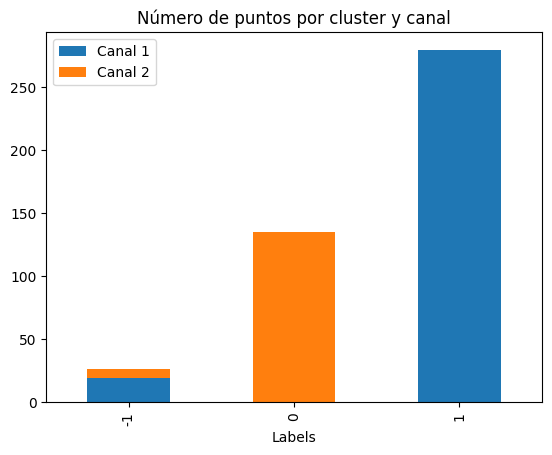

In [ ]:
ax = pd.DataFrame(df[['Labels', 'Channel']].groupby('Labels').value_counts()).unstack().plot(kind='bar', stacked=True, title='Número de puntos por cluster y canal')
ax.legend(['Canal 1', 'Canal 2']);